In [1]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import random
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt

data = pd.read_csv('/content/dataset.csv')


for i in range(len(data)-1):

  if data['거래일자'][i]>=20210000:
    print(i)
    test_start_idx = i
    break

43208


In [3]:
new_set= { 'area' : data['전용면적'][:test_start_idx],
            'floor' : data['층'][:test_start_idx],
            'trade_price' : data['거래금액'][:test_start_idx],
            'built_year' : data['건축년도'][:test_start_idx] } 
new_train_dataset=pd.DataFrame(new_set)
new_train_dataset.head()

,area,floor,trade_price,built_year
0,68.14,7,11600,2003
1,84.75,1,12000,2001
2,84.87,1,13800,1996
3,116.81,19,16700,1996
4,84.92,4,18500,2005


In [4]:
new_set= { 'area' : data['전용면적'][test_start_idx:-1],
            'floor' : data['층'][test_start_idx:-1],
            'trade_price' : data['거래금액'][test_start_idx:-1],
            'built_year' : data['건축년도'][test_start_idx:-1] } 
new_test_dataset=pd.DataFrame(new_set)
new_test_dataset.head()

,area,floor,trade_price,built_year
43208,84.9227,8,31000,2005
43209,49.3100,12,40000,2018
43210,59.9900,11,16600,2000
43211,71.7664,5,33000,2005
43212,39.7000,13,28000,2018


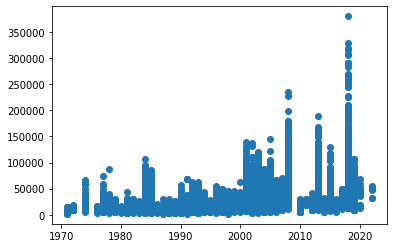

In [5]:
plt.scatter(data['건축년도'],data['거래금액'])

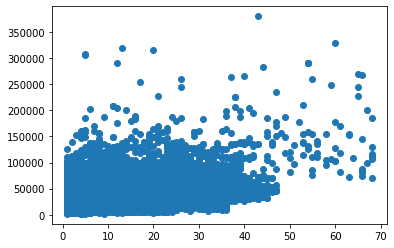

In [6]:
plt.scatter(data['층'],data['거래금액'])

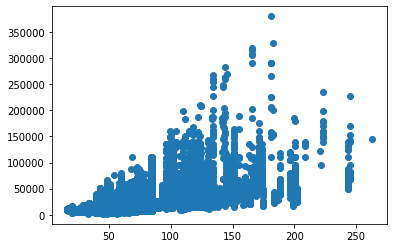

In [7]:
plt.scatter(data['전용면적'],data['거래금액'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scale_cols = ['area','floor','trade_price','built_year']
train_scaled = scaler.fit_transform(new_train_dataset[scale_cols])
train_scaled = pd.DataFrame(train_scaled)
train_scaled.columns = scale_cols




test_scaled = scaler.fit_transform(new_test_dataset[scale_cols])
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = scale_cols



In [9]:
train_scaled.head()

,area,floor,trade_price,built_year
0,0.210795,0.089552,0.034507,0.653061
1,0.278269,0.000000,0.035894,0.612245
2,0.278756,0.000000,0.042136,0.510204
3,0.408503,0.268657,0.052194,0.510204
4,0.278959,0.044776,0.058436,0.693878


In [10]:
test_scaled.head()

,area,floor,trade_price,built_year
0,0.300392,0.107692,0.071809,0.666667
1,0.144617,0.169231,0.095745,0.921569
2,0.191333,0.153846,0.033511,0.568627
3,0.242845,0.061538,0.077128,0.666667
4,0.102582,0.184615,0.063830,0.921569


In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device =='cuda':
  torch.cuda.manual_seed_all(777)

In [12]:
np.array(new_train_dataset[['area','built_year']])

array([[  68.14, 2003.  ],
       [  84.75, 2001.  ],
       [  84.87, 1996.  ],
       ...,
       [  59.94, 1996.  ],
       [  38.45, 1996.  ],
       [  72.  , 1984.  ]])

In [13]:
trainX=np.array(new_train_dataset[['area','built_year']])
trainY=np.array(new_train_dataset['trade_price'])

testX=np.array(new_test_dataset[['area','built_year']])
testY=np.array(new_test_dataset['trade_price'])

In [14]:
trainX = torch.FloatTensor(trainX)
trainY = torch.FloatTensor(trainY)
data_set = TensorDataset(trainX,trainY)

# **Linear**

In [15]:
training_epochs = 1000

#data_loader = torch.utils.data.DataLoader(data_set,batch_size = 200,shuffle=True)

In [16]:
# nn layers
linear1 = torch.nn.Linear(2,1,bias=True)
#linear2 = torch.nn.Linear(5,3,bias=True)
#linear3 = torch.nn.Linear(3,1,bias=True)
#linear3 = torch.nn.Linear(5,1,bias=True)

# y= W1x1+W2x2+w3x3+b

relu = torch.nn.ReLU()

# xavier initialization#
torch.nn.init.xavier_uniform_(linear1.weight)
#torch.nn.init.xavier_uniform_(linear2.weight)
#torch.nn.init.xavier_uniform_(linear3.weight)
#torch.nn.init.xavier_uniform_(linear3.weight)
#dropout = torch.nn.Dropout(p=0.3)

Parameter containing:
tensor([[-0.3227,  1.0785]], requires_grad=True)

In [17]:
data_loader = torch.utils.data.DataLoader(dataset = TensorDataset(trainX,trainY),batch_size= 700,shuffle=True,drop_last=True)

In [18]:
model = torch.nn.Sequential(linear1,relu).to(device)

In [19]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.3)

In [20]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = torch.nn.functional.mse_loss(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch % 100 == 0 :
      print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([700])) that is different to the input size (torch.Size([700, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if __name__ == '__main__':


Epoch: 0001 cost = 557015808.000000000
Epoch: 0101 cost = 372555488.000000000
Epoch: 0201 cost = 373257408.000000000
Epoch: 0301 cost = 373324288.000000000
Epoch: 0401 cost = 372110464.000000000
Epoch: 0501 cost = 373088352.000000000
Epoch: 0601 cost = 371243936.000000000
Epoch: 0701 cost = 373094080.000000000
Epoch: 0801 cost = 371780192.000000000
Epoch: 0901 cost = 372454208.000000000
Learning finished


In [21]:
#torch.save(model.state_dict(),'/content/model.pt')

In [22]:

#model.load_state_dict(torch.load('/content/model.pt'))
#model.eval()

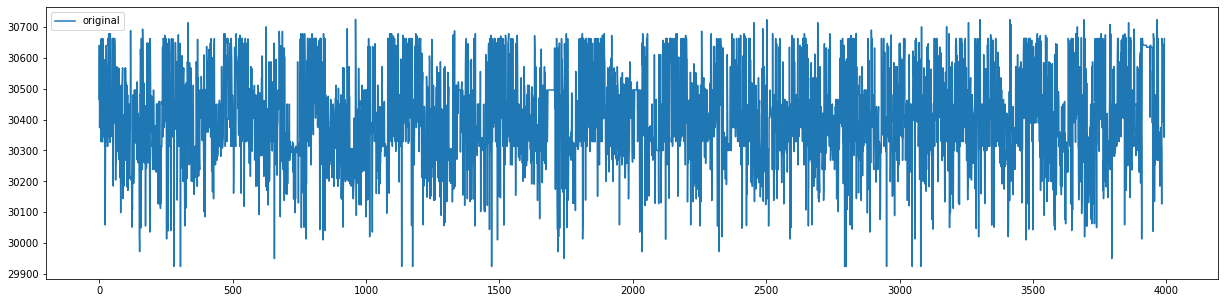

In [25]:
Pred_testX = model(torch.FloatTensor(testX))
target_pred = torch.FloatTensor(testY)
plt.figure(figsize = (21,5))
#plt.plot(target_pred.data.numpy())
plt.plot(Pred_testX.data.numpy())
plt.legend(['original', 'prediction'])
plt.show()

<Figure size 1512x144 with 0 Axes>

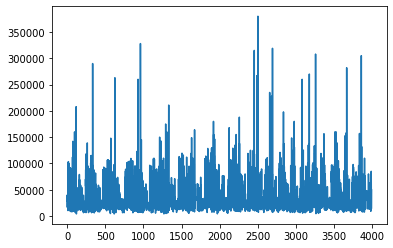

<Figure size 1512x144 with 0 Axes>

In [27]:
plt.plot(target_pred.data.numpy());plt.figure(figsize = (21,2))

In [24]:

for i in range(len(testY)-1):
  print('예측된 가격:',float(Pred_testX[i].item()))

예측된 가격: 30465.345703125
예측된 가격: 30639.8984375
예측된 가격: 30373.83203125
예측된 가격: 30457.04296875
예측된 가격: 30633.833984375
예측된 가격: 30633.833984375
예측된 가격: 30375.560546875
예측된 가격: 30327.9921875
예측된 가격: 30660.935546875
예측된 가격: 30595.796875
예측된 가격: 30573.8203125
예측된 가격: 30662.388671875
예측된 가격: 30328.365234375
예측된 가격: 30328.365234375
예측된 가격: 30633.833984375
예측된 가격: 30660.935546875
예측된 가격: 30586.25
예측된 가격: 30430.20703125
예측된 가격: 30344.05078125
예측된 가격: 30439.56640625
예측된 가격: 30454.837890625
예측된 가격: 30313.140625
예측된 가격: 30593.494140625
예측된 가격: 30059.068359375
예측된 가격: 30313.140625
예측된 가격: 30313.1015625
예측된 가격: 30404.7578125
예측된 가격: 30639.8984375
예측된 가격: 30457.04296875
예측된 가격: 30328.94140625
예측된 가격: 30573.56640625
예측된 가격: 30434.677734375
예측된 가격: 30313.1015625
예측된 가격: 30436.310546875
예측된 가격: 30662.388671875
예측된 가격: 30639.8984375
예측된 가격: 30677.478515625
예측된 가격: 30677.478515625
예측된 가격: 30344.115234375
예측된 가격: 30480.537109375
예측된 가격: 30404.71484375
예측된 가격: 30326.298828125
예측된 가격: 30677.564453125
예측된 가격: 3